# Math 124 - Programming for Mathematical Applications
UC Berkeley, Spring 2020

## Project 2 - Random Maze
Due Friday, March 4

### Description

In this project, you will write a computer code to generate a random maze using a recursive algorithm. You will also write a code to find a path between two points in a given maze.

The integer `n` specifies the size of the `n`-by-`n` array of cells in the maze.

The horizontal and the vertical *interior* walls of the maze are described by the arrays:

- `H`, Bool array of size `n`-by-`n-1`
- `V`, Bool array of size `n-1`-by-`n`

These arrays specify if there is a wall or not between two neighboring cells.

An example is given below:

In [1]:
H = Bool[0 1 0 0 0; 1 0 1 0 0; 0 1 1 0 0; 1 1 1 0 1; 0 1 0 1 1; 1 0 0 0 0];
V = Bool[1 0 1 1 1 0; 0 1 0 0 1 1; 0 0 0 0 1 0; 0 1 0 1 0 0; 0 0 1 0 1 0];

and the following helper function can be used to plot the maze:

In [2]:
using PyPlot, Random

function plot_maze(H,V)
    clf()
    axis("off")
    axis("equal")
    n = size(H,1)
    plot([0,n,n,0,0], [0,0,n,n,0], color="k")
    
    for x = 1:n-1, y = 1:n
        if V[x,y]
            plot([x,x], [y-1,y], color="k")
        end
    end
    for x = 1:n, y = 1:n-1
        if H[x,y]
            plot([x-1,x], [y,y], color="k")
        end
    end
end

plot_maze (generic function with 1 method)

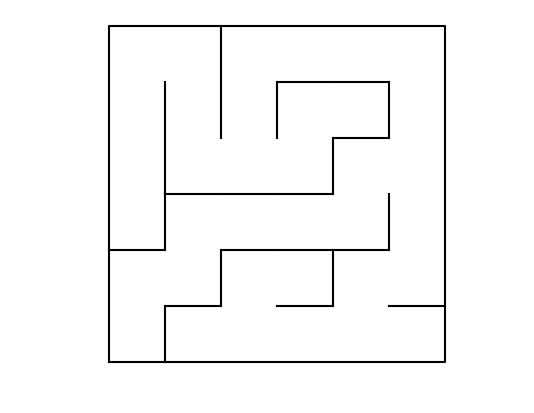

In [3]:
plot_maze(H,V)

In addition, we will find paths between the points `1,n` and `n,1`, which can be stored in two arrays of integers. For the example above, this path is given by

In [4]:
x = [6, 5, 5, 6, 6, 6, 6, 6, 5, 4, 3, 3, 3, 2, 2, 2, 1];
y = [1, 1, 2, 2, 3, 4, 5, 6, 6, 6, 6, 5, 4, 4, 5, 6, 6];

and it can be plotted along with the maze using the commands:

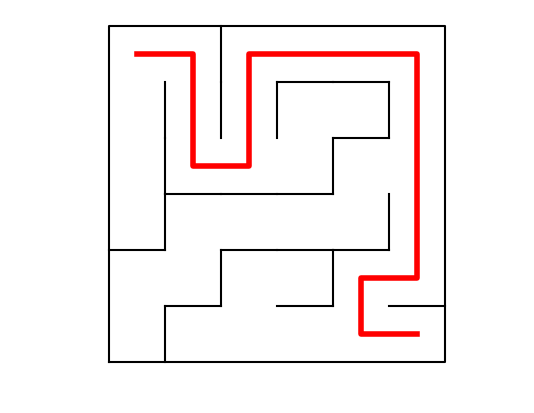

In [5]:
plot_maze(H,V);
plot(x .- 0.5, y .- 0.5, color="r", linewidth=4);

### Problem 1 - Generate random maze

Write a function with the syntax

```julia
H,V = make_maze(n)
```

which produces a random maze of size `n`-by-`n` using the following algorithm:

1. Initialize `H` and `V` to matrices of `trues` (that is, assume all cells have walls on all sides)
2. Also initialize an array `visit` to a matrix of `falses`, to keep track of cells that have been visited
3. Create a function `dig(x,y)` which loops over the four directions (Right, Left, Up, Down) in a random order. For each direction, if the neighbor cell is valid and not visited, remove the corresponding wall from `H` or `V` and run the `dig` function recursively on the neighbor cell.
4. Call `dig(1,1)` and return `H,V`

### Problem 2 - Find path from `1,n` to `n,1`

Next, write a function with the syntax

```julia
pathx, pathy = find_path(H,V)
```

which finds a path in the maze `H,V` between the coordinates `1,n` and `n,1` using the following algorithm:

1. Again create an array `visit` to keep track of visited cells
2. Also initialize empty vectors `pathx,pathy` to store the final path
3. Create a recursive function `recur(x,y)` which performs the following:
   1. If the position `x==n` and `y==1` is found, insert these values into `pathx,pathy` and return `true`
   2. Otherwise, consider each neighbor of `x,y`. If the cell is valid, the maze has no wall in that direction, and the cell has not been visited, apply `recur` to the neighbor cell.
   3. If any of the calls to `recur` returns `true`, insert `x,y` into `pathx,pathy` and return `true`
4. Call `recur(1,n)` and return `pathx,path`

### Problem 3 - Large maze test

Finally, run the code below to illustrate your codes.

In [ ]:
n = 25
H,V = make_maze(n)
plot_maze(H,V)
x, y = find_path(H,V)
plot(x .- 0.5, y .- 0.5, color="r", linewidth=4);